<a href="https://colab.research.google.com/github/7sr7/Projs-in-AI-HW-3-rev-/blob/main/Silvestre_Projs_in_AI_HW3_redo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silvestre Ronin

Professor Mushtaque

PROJECTS IN AI & MACHINE LRNG - CSCI 4170 - 01

2025 06 19

In [77]:
# importing required libraries...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel
import os
import sys
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

import time
import warnings
warnings.filterwarnings("ignore")

NOTE TO GRADER:

The very first thing I did after choosing my dataset was to run EDA and train-dev-test split. This step is explitictly stated in Part 2, Task 2.

However, the reason I chose to do this as my first step was because I figured running the "unclean" data on my Part 1 did not make sense to do since maybe features are highly correlated or if the data is not normalized, then perhaps the model will not predict as accurately as it should be.

The following link is the dataset I have chosen:

https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?select=star_classification.csv

In [78]:
# mounting to google drive...
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# reading data set...
data = pd.read_csv('/content/drive/MyDrive/star_classification.csv')

In [80]:
# viewing the first few rows of the data...
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [81]:
# determining data size....
# many data observations and data parameters --> "complex data" --> use of NNs...
data.shape

(100000, 18)

In [82]:
# checking missing values...
data.isna().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


In [83]:
# so the dataset i am using characterizes space stuff into galaxies, stars, or quasars...
# upon looking at the dataset, I noticed that "GALAXY" comprised most of the classification.
# thus, i decided to make this a binary classification as just "GALAXY" and "others (stars or quasars)"...

# making a new column that will be my binary output...
data['isGalaxy'] = data['class'].apply(lambda x: 1 if x == 'GALAXY' else 0)

data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,isGalaxy
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171,1
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427,1
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299,1
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775,1
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842,1


In [84]:
# general information about the dataset...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
 18  isGalaxy     100000 non-n

In [85]:
# statistics of the dataset (numeric columns)...
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,isGalaxy
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740,0.594450
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404,0.491001
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000,0.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000,0.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000,1.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000,1.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000,1.000000


In [86]:
# which columns have a missing value...?
data.isnull().any(axis=0)

,0
obj_ID,False
alpha,False
delta,False
u,False
g,False
r,False
i,False
z,False
run_ID,False
rerun_ID,False


In [87]:
# this shows me how each column is correlated to the other ones...
dataNum = data.select_dtypes(include='number')
dataNum.corr()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,isGalaxy
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178,0.019994
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464,0.004085
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250,-0.038297
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305,0.023129
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470,0.014289
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106,-0.037997
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787,-0.160379
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668,-0.008382
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165,0.019996
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# using VIF to determine highly correlated variables...
# these columns are very not highly correlated according to the VIF shown below, so no need to drop any of the columns...

X = data.select_dtypes(include='number')

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

        feature           VIF
0        obj_ID  5.612779e-10
1         alpha  1.000006e+00
2         delta  1.012774e+00
3             u  1.000901e+00
4             g  1.001558e+00
5             r  1.752373e+00
6             i  1.778624e+00
7             z  1.001432e+00
8        run_ID  1.060856e+00
9      rerun_ID  0.000000e+00
10      cam_col  1.000002e+00
11     field_ID  1.007017e+00
12  spec_obj_ID  2.351782e+02
13     redshift  1.177915e+00
14        plate  2.090999e+09
15          MJD  1.701719e+01
16     fiber_ID  1.061814e+00
17     isGalaxy  1.012193e+00


In [89]:
# is the data imbalanced...?
data.isGalaxy.value_counts(normalize=True)

,proportion
isGalaxy,
1,0.59445
0,0.40555


In [90]:
# THIS TAKES TOO LONG -- 17+ mins and still running...

# ploting pairwise relationships in the dataset...

# sns.pairplot(data, hue='isGalaxy')

<Axes: >

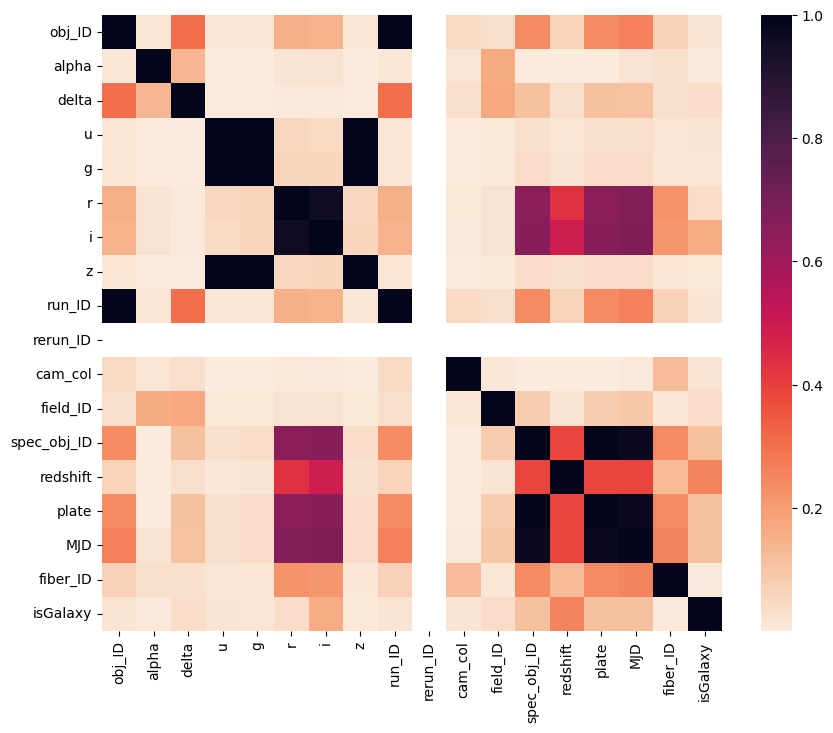

In [91]:
# ploting heatmap of the dataset...

dataNum = data.select_dtypes(include='number')
correlatedData = dataNum.corr()

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlatedData.abs(),annot=False, ax=ax, cmap='rocket_r')


Performing train-dev-test split...

In [92]:
# the reason we split the data sample into 20000 is because of the fact that i run out of storage / CPU to run the entire dataset...
dataSubset = data.sample(n=20000, random_state=42)


In [93]:
# formatting data such that i can train-dev-test split it...

# excluding "y" column for X matrix...
tmp = dataSubset.drop(columns = ['isGalaxy'])
dataNum = tmp.select_dtypes(include='number')
X = dataNum.values

# standardizing...
avg, stdev = X.mean(), X.std()
X = (X - avg) / stdev

# normalizing...
min, max = X.min(), X.max()
X = (X - min) / (max - min)

y = dataSubset['isGalaxy'].values.reshape(-1,1)
n = X.shape[1]

if False:
  print(X.shape)
  sys.exit(0)

if False:
  # print(X)
  print(y)
  print(y.shape)
  sys.exit(0)


# excluding "y" column for X matrix...
tmp = dataSubset.drop(columns = ['isGalaxy'])
dataNum = tmp.select_dtypes(include='number')
X = dataNum.values

# standardizing...
avg, stdev = X.mean(), X.std()
X = (X - avg) / stdev

# normalizing...
min, max = X.min(), X.max()
X = (X - min) / (max - min)

y = dataSubset['isGalaxy'].values.reshape(-1,1)
n = X.shape[1]

if False:
  print(X.shape)
  sys.exit(0)

if False:
  # print(X)
  print(y)
  print(y.shape)
  sys.exit(0)


# dividing data into train and test sets...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

if False:
  print(X_train.shape)
  print(y_train.shape)
  sys.exit(0)


PART 1 START...

In [94]:
class NeuralNetwork:
  # initialization method...
  def __init__(self, inputSize, hiddenSize, outputSize, inLearningRate, inActivation, inGradient):
    # weights...
    # this is because we do the W * X (input) as our first computation...
    # so does this mean that the X format must be of the format (inputSize, numSamples)...?
    self.W1 = np.random.randn(hiddenSize, inputSize) * .01

    # i think intuitively, it makes sense to have outputsize first since we want
    # our computation to result in something that is of the outputsize...
    self.W2 = np.random.randn(outputSize, hiddenSize) * .01

    # biases...
    self.b1 = np.zeros((hiddenSize, 1))
    self.b2 = np.zeros((outputSize, 1))

    # learning rate...
    self.learningRate = inLearningRate


    # to store the values that were calculated, since we need them for back propagation...
    self.tempCache = {
        'Z1': None,
        'A1': None,
        'Z2': None,
        'A2': None,
    }

    self.gradients = {
        'dW1': None,
        'db1': None,
        'dW2': None,
        'db2': None,
    }


    self.activationMethod = inActivation
    self.gradientMethod = inGradient


  # activation method...
  def activation(self, z):
    # implementation of different activation methods as part of my hyperparamter tuning...
    if (self.activationMethod == "tanh"):
      return np.tanh(z)

    elif (self.activationMethod == "sigmoid"):
      return 1 / (1 + np.exp(-z))

    # relu...
    else:
      if False:
        res = np.maximum(0, z)

      else:
        res = (z > 0).astype(float)

      # assert 0 <= z <= 1

      return res


  # forward propagation method...
  def forwardPropagation(self, X):
    # layer1...
    Z1 = np.dot(self.W1, X) + self.b1
    A1 = self.activation(Z1)

    # layer2...
    Z2 = np.dot(self.W2, A1) + self.b2

    # i have binary classification problem, so i am using BCE as my loss function
    # however, the problem with using tanh or relu for a final activation is that
    # having output that is not between 0 to 1 causes log to "break".
    # therefore, i strictly use sigmoid as the final output, since it will bound
    # the final classification to consistently be btwn 0 and 1, and thus, we can
    # safely use BCE
    if False:
      A2 = self.activation(Z2)

    else:
      A2 = 1 / (1 + np.exp(-Z2))
      # assert 0 <= A2 and A2 <= 1


    # storing values...
    self.tempCache['Z1'] = Z1
    self.tempCache['A1'] = A1
    self.tempCache['Z2'] = Z2
    self.tempCache['A2'] = A2

    return


  # backward propagation method...
  def backwardPropagation(self, X, y):
    # so again, X data must be of the form (inputSize, numSamples)...
    m = X.shape[1]

    dZ2 = self.tempCache['A2'] - y
    dW2 = np.dot(dZ2, self.tempCache['A1'].T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m


    # difference in dZ1 depends on which activation method was used in forward propagation method...
    if (self.activationMethod == "tanh"):
      dZ1 = np.dot(self.W2.T, dZ2) * (1 - np.power(self.tempCache['A1'], 2))

    elif (self.activationMethod == "sigmoid"):
      dZ1 = np.dot(self.W2.T, dZ2) * (self.tempCache['A1'] * (1 - self.tempCache['A1']))

    else:
      reluDeriv = (self.tempCache['Z1'] > 0).astype(int)
      # dZ1 = np.dot(self.W2.T, dZ2) * (self.tempCache['A1'] * reluDeriv)
      dZ1 = np.dot(self.W2.T, dZ2) * reluDeriv


    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m


    self.gradients['dW1'] = dW1
    self.gradients['db1'] = db1
    self.gradients['dW2'] = dW2
    self.gradients['db2'] = db2

    return


  # updates parameters based on the gradient descent calculations...
  def updateParameters(self):
    self.W1 -= self.learningRate * self.gradients['dW1']
    self.b1 -= self.learningRate * self.gradients['db1']
    self.W2 -= self.learningRate * self.gradients['dW2']
    self.b2 -= self.learningRate * self.gradients['db2']


  # cost method that calculates the loss function...
  def computeCost(self, y):
    m = y.shape[1]

    logprobs = np.multiply(np.log(self.tempCache['A2']), y) + np.multiply(np.log(1 - self.tempCache['A2']), 1 - y)
    cost = -np.sum(logprobs) / m

    cost = float(np.squeeze(cost))

    return cost


  # train method...
  def train(self, X, y, numIterations=1000, batchSize=32):
    if (self.gradientMethod == "batch"):
      for i in range(numIterations):
        self.forwardPropagation(X)

        cost = self.computeCost(y)

        self.backwardPropagation(X, y)
        self.updateParameters()

        if True and i % (numIterations // 10) == 0:
          print(f"Cost after iteration {i}: {cost}")


    elif (self.gradientMethod == "miniBatch"):
      m = X.shape[1]

      for i in range(numIterations):
        # Shuffle indices
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[:, indices]
        y_shuffled = y[:, indices]

        for j in range(0, m, batchSize):
          X_batch = X_shuffled[:, j:j+batchSize]
          y_batch = y_shuffled[:, j:j+batchSize]

          self.forwardPropagation(X_batch)
          self.backwardPropagation(X_batch, y_batch)
          self.updateParameters()

        cost = self.computeCost(y_batch)


        # Optional: track cost after each epoch
        if i % (numIterations // 10) == 0:
          print(f"Cost after iteration {i}: {cost}")


    # stochastic method...
    else:
      y = y.reshape(1, -1)
      m = X.shape[1]

      for i in range(numIterations):
        # Shuffle the dataset
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[:, indices]
        y_shuffled = y[:, indices]

        for j in range(m):
          X_sample = X_shuffled[:, j].reshape(-1, 1)
          y_sample = y_shuffled[:, j].reshape(-1, 1)

          self.forwardPropagation(X_sample)
          self.backwardPropagation(X_sample, y_sample)
          self.updateParameters()

        # Optional: compute cost on last sample for feedback
        if i % (numIterations // 10) == 0:
          cost = self.computeCost(y_sample)
          print(f"Cost after iteration {i}: {cost}")

    print(f"Final cost: {cost}")
    return


  # predict method for test set calculations...
  def predict(self, X):
    self.forwardPropagation(X)
    res = self.tempCache['A2']

    return (res > 0.5).astype(int)

hyperparameter tuning...
(independently varying factors such as hidden layer size, learning rate, activation method, gradient method...)

varying hidden layer size...

In [95]:
# HIDDEN LAYER = 16

inputSize = X.shape[1]
hiddenSize = 16
outputSize = 1
learningRate = .001
activation = "tanh"
gradient = "batch"

myNN = NeuralNetwork(inputSize, hiddenSize, outputSize, learningRate, activation, gradient)
myNN.train(X_train, y_train, numIterations=1000)

Cost after iteration 0: 0.6931424328545076
Cost after iteration 100: 0.6922650848742425
Cost after iteration 200: 0.6914306344859016
Cost after iteration 300: 0.6906369811490749
Cost after iteration 400: 0.6898821259302668
Cost after iteration 500: 0.6891641668183419
Cost after iteration 600: 0.688481294225302
Cost after iteration 700: 0.6878317866688367
Cost after iteration 800: 0.6872140066326539
Cost after iteration 900: 0.6866263966002375
Final cost: 0.6860729271458461


In [ ]:
y_pred = myNN.predict(X_test)

# for compatibility...
y_true = y_test.flatten()
y_pred_flat = y_pred.flatten()

print("Accuracy:", accuracy_score(y_true, y_pred_flat))
print("Precision:", precision_score(y_true, y_pred_flat))
print("Recall:", recall_score(y_true, y_pred_flat))
print("F1 Score:", f1_score(y_true, y_pred_flat))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_flat))
print("\nClassification Report:")
print(classification_report(y_true, y_pred_flat))


# TN FP
# FN TP

Accuracy: 0.586
Precision: 0.586
Recall: 1.0
F1 Score: 0.7389659520807061

Confusion Matrix:
[[   0 1656]
 [   0 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1656
           1       0.59      1.00      0.74      2344

    accuracy                           0.59      4000
   macro avg       0.29      0.50      0.37      4000
weighted avg       0.34      0.59      0.43      4000



In [ ]:
# HIDDEN LAYER = 64

inputSize = X.shape[1]
hiddenSize = 64
outputSize = 1
learningRate = .0001
activation = "relu"
gradient = "batch"

myNN = NeuralNetwork(inputSize, hiddenSize, outputSize, learningRate, activation, gradient)
myNN.train(X_train, y_train, numIterations=1000)

Cost after iteration 0: 0.6967737829755144
Cost after iteration 100: 0.6938147342791431
Cost after iteration 200: 0.691248471516077
Cost after iteration 300: 0.6890379513983692
Cost after iteration 400: 0.6871417206567242
Cost after iteration 500: 0.685473111406531
Cost after iteration 600: 0.6840107808307967
Cost after iteration 700: 0.6827146852513399
Cost after iteration 800: 0.6815949385616582
Cost after iteration 900: 0.6806419114466041
Final cost: 0.6798196552676106


In [ ]:
y_pred = myNN.predict(X_test)

# for compatibility...
y_true = y_test.flatten()
y_pred_flat = y_pred.flatten()

print("Accuracy:", accuracy_score(y_true, y_pred_flat))
print("Precision:", precision_score(y_true, y_pred_flat))
print("Recall:", recall_score(y_true, y_pred_flat))
print("F1 Score:", f1_score(y_true, y_pred_flat))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_flat))
print("\nClassification Report:")
print(classification_report(y_true, y_pred_flat))


# TN FP
# FN TP

Accuracy: 0.586
Precision: 0.586
Recall: 1.0
F1 Score: 0.7389659520807061

Confusion Matrix:
[[   0 1656]
 [   0 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1656
           1       0.59      1.00      0.74      2344

    accuracy                           0.59      4000
   macro avg       0.29      0.50      0.37      4000
weighted avg       0.34      0.59      0.43      4000



In [ ]:
# HIDDEN LAYER = 128

inputSize = X.shape[1]
hiddenSize = 128
outputSize = 1
learningRate = .0001
activation = "relu"
gradient = "batch"

myNN = NeuralNetwork(inputSize, hiddenSize, outputSize, learningRate, activation, gradient)
myNN.train(X_train, y_train, numIterations=1000)

Cost after iteration 0: nan
Cost after iteration 100: 3.1136957065447004
Cost after iteration 200: 2.674907651202478
Cost after iteration 300: 2.4290055425249037
Cost after iteration 400: 2.2582840820780117
Cost after iteration 500: 2.1279450391191745
Cost after iteration 600: 2.022864565004086
Cost after iteration 700: 1.9350878655031807
Cost after iteration 800: 1.8599102603322257
Cost after iteration 900: 1.7943169591313761
Final cost: 1.736807983034338


In [ ]:
y_pred = myNN.predict(X_test)

# for compatibility...
y_true = y_test.flatten()
y_pred_flat = y_pred.flatten()

print("Accuracy:", accuracy_score(y_true, y_pred_flat))
print("Precision:", precision_score(y_true, y_pred_flat))
print("Recall:", recall_score(y_true, y_pred_flat))
print("F1 Score:", f1_score(y_true, y_pred_flat))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_flat))
print("\nClassification Report:")
print(classification_report(y_true, y_pred_flat))


# TN FP
# FN TP

Accuracy: 0.414
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Confusion Matrix:
[[1656    0]
 [2344    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.41      1.00      0.59      1656
           1       0.00      0.00      0.00      2344

    accuracy                           0.41      4000
   macro avg       0.21      0.50      0.29      4000
weighted avg       0.17      0.41      0.24      4000



varying different gradient descent versions...

In [ ]:
# GRADIENT METHOD = batch (regular)

inputSize = X.shape[1]
hiddenSize = 64
outputSize = 1
learningRate = .0001
activation = "relu"
gradient = "batch"

myNN = NeuralNetwork(inputSize, hiddenSize, outputSize, learningRate, activation, gradient)
myNN.train(X_train, y_train, numIterations=1000)

Cost after iteration 0: nan
Cost after iteration 100: 3.10971852907497
Cost after iteration 200: 2.673241568030777
Cost after iteration 300: 2.4280177323182675
Cost after iteration 400: 2.2576193887715985
Cost after iteration 500: 2.1274687817512516
Cost after iteration 600: 2.022511347600047
Cost after iteration 700: 1.9348210146515334
Cost after iteration 800: 1.8597071559250826
Cost after iteration 900: 1.794162669386415
Final cost: 1.736691792991875


In [ ]:
y_pred = myNN.predict(X_test)

# for compatibility...
y_true = y_test.flatten()
y_pred_flat = y_pred.flatten()

print("Accuracy:", accuracy_score(y_true, y_pred_flat))
print("Precision:", precision_score(y_true, y_pred_flat))
print("Recall:", recall_score(y_true, y_pred_flat))
print("F1 Score:", f1_score(y_true, y_pred_flat))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_flat))
print("\nClassification Report:")
print(classification_report(y_true, y_pred_flat))


# TN FP
# FN TP

Accuracy: 0.414
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Confusion Matrix:
[[1656    0]
 [2344    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.41      1.00      0.59      1656
           1       0.00      0.00      0.00      2344

    accuracy                           0.41      4000
   macro avg       0.21      0.50      0.29      4000
weighted avg       0.17      0.41      0.24      4000



In [ ]:
# GRADIENT METHOD = minibatch

inputSize = X.shape[1]
hiddenSize = 64
outputSize = 1
learningRate = .0001
activation = "relu"
gradient = "miniBatch"

myNN = NeuralNetwork(inputSize, hiddenSize, outputSize, learningRate, activation, gradient)
myNN.train(X_train, y_train, numIterations=1000)

Cost after iteration 0: 2.67000043584224
Cost after iteration 100: 0.6524931260847326
Cost after iteration 200: 0.6395144681640946
Cost after iteration 300: 0.6634940632438597
Cost after iteration 400: 0.663432032045579
Cost after iteration 500: 0.699468266411975
Cost after iteration 600: 0.6753739541085141
Cost after iteration 700: 0.6994676210469077
Cost after iteration 800: 0.6752399202441081
Cost after iteration 900: 0.6994951252591267
Final cost: 0.6272336223141148


In [ ]:
y_pred = myNN.predict(X_test)

# for compatibility...
y_true = y_test.flatten()
y_pred_flat = y_pred.flatten()

print("Accuracy:", accuracy_score(y_true, y_pred_flat))
print("Precision:", precision_score(y_true, y_pred_flat))
print("Recall:", recall_score(y_true, y_pred_flat))
print("F1 Score:", f1_score(y_true, y_pred_flat))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_flat))
print("\nClassification Report:")
print(classification_report(y_true, y_pred_flat))


# TN FP
# FN TP

Accuracy: 0.586
Precision: 0.586
Recall: 1.0
F1 Score: 0.7389659520807061

Confusion Matrix:
[[   0 1656]
 [   0 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1656
           1       0.59      1.00      0.74      2344

    accuracy                           0.59      4000
   macro avg       0.29      0.50      0.37      4000
weighted avg       0.34      0.59      0.43      4000



In [ ]:
# GRADIENT METHOD = stochastic

inputSize = X.shape[1]
hiddenSize = 64
outputSize = 1
learningRate = .0001
activation = "relu"
gradient = "stochastic"

myNN = NeuralNetwork(inputSize, hiddenSize, outputSize, learningRate, activation, gradient)
# the reason number of iterations is so small is because this method takes quite time...
myNN.train(X_train, y_train, numIterations=50)

Cost after iteration 0: 0.743783275340818
Cost after iteration 5: 0.5218278715567222
Cost after iteration 10: 0.5191201923699944
Cost after iteration 15: 0.5210170233731019
Cost after iteration 20: 0.5262354902844298
Cost after iteration 25: 0.518386054143312
Cost after iteration 30: 0.5207303406336328
Cost after iteration 35: 0.5192504518712284
Cost after iteration 40: 0.5203039681807001
Cost after iteration 45: 0.8989247439132437
Final cost: 0.8989247439132437


In [ ]:
y_pred = myNN.predict(X_test)

# for compatibility...
y_true = y_test.flatten()
y_pred_flat = y_pred.flatten()

print("Accuracy:", accuracy_score(y_true, y_pred_flat))
print("Precision:", precision_score(y_true, y_pred_flat))
print("Recall:", recall_score(y_true, y_pred_flat))
print("F1 Score:", f1_score(y_true, y_pred_flat))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_flat))
print("\nClassification Report:")
print(classification_report(y_true, y_pred_flat))


# TN FP
# FN TP

Accuracy: 0.586
Precision: 0.586
Recall: 1.0
F1 Score: 0.7389659520807061

Confusion Matrix:
[[   0 1656]
 [   0 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1656
           1       0.59      1.00      0.74      2344

    accuracy                           0.59      4000
   macro avg       0.29      0.50      0.37      4000
weighted avg       0.34      0.59      0.43      4000



varying different activation functions...

In [ ]:
# ACTIVATION METHOD = tanh

inputSize = X.shape[1]
hiddenSize = 64
outputSize = 1
learningRate = .0001
activation = "tanh"
gradient = "batch"

myNN = NeuralNetwork(inputSize, hiddenSize, outputSize, learningRate, activation, gradient)
# the reason number of iterations is so small is because this method takes quite time...
myNN.train(X_train, y_train, numIterations=1000)

Cost after iteration 0: nan
Cost after iteration 100: 2.9947683097180278
Cost after iteration 200: 2.613972126592319
Cost after iteration 300: 2.387281777164225
Cost after iteration 400: 2.226195129239298
Cost after iteration 500: 2.1016772442801046
Cost after iteration 600: 2.0005182705587377
Cost after iteration 700: 1.9155821268058457
Cost after iteration 800: 1.8425728797652492
Cost after iteration 900: 1.7787024724762794
Final cost: 1.7225938066714634


In [ ]:
y_pred = myNN.predict(X_test)

# for compatibility...
y_true = y_test.flatten()
y_pred_flat = y_pred.flatten()

print("Accuracy:", accuracy_score(y_true, y_pred_flat))
print("Precision:", precision_score(y_true, y_pred_flat))
print("Recall:", recall_score(y_true, y_pred_flat))
print("F1 Score:", f1_score(y_true, y_pred_flat))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_flat))
print("\nClassification Report:")
print(classification_report(y_true, y_pred_flat))


# TN FP
# FN TP

Accuracy: 0.414
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Confusion Matrix:
[[1656    0]
 [2344    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.41      1.00      0.59      1656
           1       0.00      0.00      0.00      2344

    accuracy                           0.41      4000
   macro avg       0.21      0.50      0.29      4000
weighted avg       0.17      0.41      0.24      4000



In [ ]:
# ACTIVATION METHOD = sigmoid

inputSize = X.shape[1]
hiddenSize = 64
outputSize = 1
learningRate = .0001
activation = "sigmoid"
gradient = "batch"

myNN = NeuralNetwork(inputSize, hiddenSize, outputSize, learningRate, activation, gradient)
# the reason number of iterations is so small is because this method takes quite time...
myNN.train(X_train, y_train, numIterations=1000)

Cost after iteration 0: 0.6930147661497231
Cost after iteration 100: 0.691561987994026
Cost after iteration 200: 0.6902276023564289
Cost after iteration 300: 0.689001941677873
Cost after iteration 400: 0.6878761199704823
Cost after iteration 500: 0.6868419721691137
Cost after iteration 600: 0.6858919976235913
Cost after iteration 700: 0.6850193075642185
Cost after iteration 800: 0.684217576354869
Cost after iteration 900: 0.683480996336619
Final cost: 0.6828107239677169


In [ ]:
y_pred = myNN.predict(X_test)

# for compatibility...
y_true = y_test.flatten()
y_pred_flat = y_pred.flatten()

print("Accuracy:", accuracy_score(y_true, y_pred_flat))
print("Precision:", precision_score(y_true, y_pred_flat))
print("Recall:", recall_score(y_true, y_pred_flat))
print("F1 Score:", f1_score(y_true, y_pred_flat))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_flat))
print("\nClassification Report:")
print(classification_report(y_true, y_pred_flat))


# TN FP
# FN TP

Accuracy: 0.586
Precision: 0.586
Recall: 1.0
F1 Score: 0.7389659520807061

Confusion Matrix:
[[   0 1656]
 [   0 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1656
           1       0.59      1.00      0.74      2344

    accuracy                           0.59      4000
   macro avg       0.29      0.50      0.37      4000
weighted avg       0.34      0.59      0.43      4000



In [ ]:
# ACTIVATION METHOD = relu

inputSize = X.shape[1]
hiddenSize = 64
outputSize = 1
learningRate = .0001
activation = "relu"
gradient = "batch"

myNN = NeuralNetwork(inputSize, hiddenSize, outputSize, learningRate, activation, gradient)
# the reason number of iterations is so small is because this method takes quite time...
myNN.train(X_train, y_train, numIterations=1000)

Cost after iteration 0: nan
Cost after iteration 100: 3.0628870061386526
Cost after iteration 200: 2.651035069521047
Cost after iteration 300: 2.4135880905928015
Cost after iteration 400: 2.24700277522526
Cost after iteration 500: 2.1191161087586945
Cost after iteration 600: 2.0156578562441405
Cost after iteration 700: 1.9290332271363673
Cost after iteration 800: 1.8547156735368657
Cost after iteration 900: 1.7897886401583882
Final cost: 1.732805989108249


In [ ]:
y_pred = myNN.predict(X_test)

# for compatibility...
y_true = y_test.flatten()
y_pred_flat = y_pred.flatten()

print("Accuracy:", accuracy_score(y_true, y_pred_flat))
print("Precision:", precision_score(y_true, y_pred_flat))
print("Recall:", recall_score(y_true, y_pred_flat))
print("F1 Score:", f1_score(y_true, y_pred_flat))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_flat))
print("\nClassification Report:")
print(classification_report(y_true, y_pred_flat))


# TN FP
# FN TP

Accuracy: 0.414
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Confusion Matrix:
[[1656    0]
 [2344    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.41      1.00      0.59      1656
           1       0.00      0.00      0.00      2344

    accuracy                           0.41      4000
   macro avg       0.21      0.50      0.29      4000
weighted avg       0.17      0.41      0.24      4000



Discussion:

The tecnique used to help with runtime was mainly just randomly selecting a smaller population of my data (from 100000 entries to 20000).


For our hypertuning, varying hidden layer did not seem to have an effect on the results.

However, there was certainly a big notice in both runtime and accuracy (in terms of loss) for varying gradient. Batch gradient had the highest loss, while not having significantly long runtime. On the other hand, stochastic did not converge as well as the fact that it took severely more time to execute, which is why I had to lower the number of iterations. Lastly, minibatch gradient seemed to do ok in runtime. It is worth noting that the only gradient to converge was batch... Perhaps this is due to the sensitivity of hyper parameter tuning, as there are many things that can be tuned.

Lastly, upon independently varying activation functions, it was observed that both relu and and tanh seemed to display similar performance. However, sigmoid was generally the most accurate (least amount of final loss).

PART 2 START...

While my dataset is tabular, it can be considered complex, given the total number of data observations (100000) and data features that it has (18).

For the Deep Learning Framework that I chose to implement, I used PyTorch.
The resources I utilized for the completion of this part 2 are the following:
- https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
- https://docs.pytorch.org/docs/stable/optim.html
- https://blog.paperspace.com/why-use-pytorch-deep-learning-framework/

I also used ChatGPT to help me with debugging and also getting familiar with the PyTorch built-in methods.


The main motivation for using PyTorch is given how beginner friendly it is, both in syntax and is considered easier to learn compared to other deep learning frameworks, such as TensorFlow.


To implement forward propagation, I needed to learn how to build custom model layers using torch.nn.Linear and how to apply activation functions like ReLU and Sigmoid using torch.nn.functional. Additionally, for backward propagation, I looked into different optimizers for different verions of gradient descent. This was necessary in my hyperparameter tuning. Finally, I had to understand how to use DataLoader for batching and torch.Tensor operations for vectorized computations.

In [ ]:
# formatting data such that i can train-dev-test split it...

# excluding "y" column for X matrix...
tmp = data.drop(columns = ['isGalaxy'])
dataNum = tmp.select_dtypes(include='number')
X = dataNum.values

# standardizing...
avg, stdev = X.mean(), X.std()
X = (X - avg) / stdev

# normalizing...
min, max = X.min(), X.max()
X = (X - min) / (max - min)

y = data['isGalaxy'].values.reshape(-1,1)
n = X.shape[1]

if False:
  print(X.shape)
  sys.exit(0)

if False:
  # print(X)
  print(y)
  print(y.shape)
  sys.exit(0)

# dividing data into train and test sets...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train = X_train.T
# y_train = y_train.T

if False:
  print(X_train.shape)
  print(y_train.shape)
  sys.exit(0)


In [ ]:
# converting numpy arrays to pytorch tensors...
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# creating datasets...
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# creating loaders...
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

In [ ]:
class nnTorch(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(nnTorch, self).__init__()

    if True:
      self.fc1 = nn.Linear(input_size, hidden_size)
      self.relu = nn.ReLU()
      self.fc2 = nn.Linear(hidden_size, output_size)
      self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)

    if True:
      return self.sigmoid(out)
    else:
      return out


In [ ]:
input_size = X_train.shape[1]

if False:
  print(input_size)
  sys.exit(0)

# adjust this in hypertuning...
hidden_size = 128
output_size = 1

model = nnTorch(input_size, hidden_size, output_size)

# Binary Cross Entropy is good for binary classification
if True:
  criterion = nn.BCELoss()
else:
  criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


num_epochs = 20
epsilon = .001

for epoch in range(num_epochs):
  for batch_X, batch_y in train_loader:
    batch_y = torch.argmax(batch_y, dim=1).unsqueeze(1).float()

    if False:
      print(batch_y)
      sys.exit(0)

    # forward...
    outputs = model.forward(batch_X)
    loss = criterion(outputs, batch_y.view(-1, 1).float())

    if False:
      print(outputs.shape, batch_y.view(-1, 1).shape)
      sys.exit(0)

    # backward...
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if (loss < epsilon):
    #   break

  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 1/20, Loss: 0.6931
Epoch 2/20, Loss: 0.6931
Epoch 3/20, Loss: 0.6931
Epoch 4/20, Loss: 0.6931
Epoch 5/20, Loss: 0.6931
Epoch 6/20, Loss: 0.6931
Epoch 7/20, Loss: 0.6931
Epoch 8/20, Loss: 0.6931
Epoch 9/20, Loss: 0.6931
Epoch 10/20, Loss: 0.6931
Epoch 11/20, Loss: 0.6931
Epoch 12/20, Loss: 0.6931
Epoch 13/20, Loss: 0.6931
Epoch 14/20, Loss: 0.6931
Epoch 15/20, Loss: 0.6931
Epoch 16/20, Loss: 0.6931
Epoch 17/20, Loss: 0.6931
Epoch 18/20, Loss: 0.6931
Epoch 19/20, Loss: 0.6931
Epoch 20/20, Loss: 0.6931


In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

y_pred = (y_pred > 0.5).float()


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# confusion matrix and other evaluation metrics...
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# TN FP
# FN TP

Accuracy: 0.407
Precision: 0.0
Recall: 0.0
F1: 0.0
[[ 8140     0]
 [11860     0]]
              precision    recall  f1-score   support

           0       0.41      1.00      0.58      8140
           1       0.00      0.00      0.00     11860

    accuracy                           0.41     20000
   macro avg       0.20      0.50      0.29     20000
weighted avg       0.17      0.41      0.24     20000



In [ ]:
# sgd...

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


num_epochs = 20
epsilon = .001

for epoch in range(num_epochs):
  for batch_X, batch_y in train_loader:
    batch_y = torch.argmax(batch_y, dim=1).unsqueeze(1).float()

    if False:
      print(batch_y)
      sys.exit(0)

    # forward...
    outputs = model.forward(batch_X)
    loss = criterion(outputs, batch_y.view(-1, 1).float())

    if False:
      print(outputs.shape, batch_y.view(-1, 1).shape)
      sys.exit(0)

    # backward...
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if (loss < epsilon):
    #   break

  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 1/20, Loss: 0.6931
Epoch 2/20, Loss: 0.6931
Epoch 3/20, Loss: 0.6931
Epoch 4/20, Loss: 0.6931
Epoch 5/20, Loss: 0.6931
Epoch 6/20, Loss: 0.6931
Epoch 7/20, Loss: 0.6931
Epoch 8/20, Loss: 0.6931
Epoch 9/20, Loss: 0.6931
Epoch 10/20, Loss: 0.6931
Epoch 11/20, Loss: 0.6931
Epoch 12/20, Loss: 0.6931
Epoch 13/20, Loss: 0.6931
Epoch 14/20, Loss: 0.6931
Epoch 15/20, Loss: 0.6931
Epoch 16/20, Loss: 0.6931
Epoch 17/20, Loss: 0.6931
Epoch 18/20, Loss: 0.6931
Epoch 19/20, Loss: 0.6931
Epoch 20/20, Loss: 0.6931


In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

y_pred = (y_pred > 0.5).float()


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# confusion matrix and other evaluation metrics...
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# TN FP
# FN TP

Accuracy: 0.407
Precision: 0.0
Recall: 0.0
F1: 0.0
[[ 8140     0]
 [11860     0]]
              precision    recall  f1-score   support

           0       0.41      1.00      0.58      8140
           1       0.00      0.00      0.00     11860

    accuracy                           0.41     20000
   macro avg       0.20      0.50      0.29     20000
weighted avg       0.17      0.41      0.24     20000



In [ ]:
# rmsprop...

optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)


num_epochs = 20
epsilon = .001

for epoch in range(num_epochs):
  for batch_X, batch_y in train_loader:
    batch_y = torch.argmax(batch_y, dim=1).unsqueeze(1).float()

    if False:
      print(batch_y)
      sys.exit(0)

    # forward...
    outputs = model.forward(batch_X)
    loss = criterion(outputs, batch_y.view(-1, 1).float())

    if False:
      print(outputs.shape, batch_y.view(-1, 1).shape)
      sys.exit(0)

    # backward...
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if (loss < epsilon):
    #   break

  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 1/20, Loss: 0.6931
Epoch 2/20, Loss: 0.6931
Epoch 3/20, Loss: 0.6931
Epoch 4/20, Loss: 0.6931
Epoch 5/20, Loss: 0.6931
Epoch 6/20, Loss: 0.6931
Epoch 7/20, Loss: 0.6931
Epoch 8/20, Loss: 0.6931
Epoch 9/20, Loss: 0.6931
Epoch 10/20, Loss: 0.6931
Epoch 11/20, Loss: 0.6931
Epoch 12/20, Loss: 0.6931
Epoch 13/20, Loss: 0.6931
Epoch 14/20, Loss: 0.6931
Epoch 15/20, Loss: 0.6931
Epoch 16/20, Loss: 0.6931
Epoch 17/20, Loss: 0.6931
Epoch 18/20, Loss: 0.6931
Epoch 19/20, Loss: 0.6931
Epoch 20/20, Loss: 0.6931


In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

y_pred = (y_pred > 0.5).float()


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# confusion matrix and other evaluation metrics...
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# TN FP
# FN TP

Accuracy: 0.407
Precision: 0.0
Recall: 0.0
F1: 0.0
[[ 8140     0]
 [11860     0]]
              precision    recall  f1-score   support

           0       0.41      1.00      0.58      8140
           1       0.00      0.00      0.00     11860

    accuracy                           0.41     20000
   macro avg       0.20      0.50      0.29     20000
weighted avg       0.17      0.41      0.24     20000



In [ ]:
# adagrad...

optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)


num_epochs = 20
epsilon = .001

for epoch in range(num_epochs):
  for batch_X, batch_y in train_loader:
    batch_y = torch.argmax(batch_y, dim=1).unsqueeze(1).float()

    if False:
      print(batch_y)
      sys.exit(0)

    # forward...
    outputs = model.forward(batch_X)
    loss = criterion(outputs, batch_y.view(-1, 1).float())

    if False:
      print(outputs.shape, batch_y.view(-1, 1).shape)
      sys.exit(0)

    # backward...
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if (loss < epsilon):
    #   break

  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 1/20, Loss: 0.6931
Epoch 2/20, Loss: 0.6931
Epoch 3/20, Loss: 0.6931
Epoch 4/20, Loss: 0.6931
Epoch 5/20, Loss: 0.6931
Epoch 6/20, Loss: 0.6931
Epoch 7/20, Loss: 0.6931
Epoch 8/20, Loss: 0.6931
Epoch 9/20, Loss: 0.6931
Epoch 10/20, Loss: 0.6931
Epoch 11/20, Loss: 0.6931
Epoch 12/20, Loss: 0.6931
Epoch 13/20, Loss: 0.6931
Epoch 14/20, Loss: 0.6931
Epoch 15/20, Loss: 0.6931
Epoch 16/20, Loss: 0.6931
Epoch 17/20, Loss: 0.6931
Epoch 18/20, Loss: 0.6931
Epoch 19/20, Loss: 0.6931
Epoch 20/20, Loss: 0.6931


In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

y_pred = (y_pred > 0.5).float()


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# confusion matrix and other evaluation metrics...
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# TN FP
# FN TP

Accuracy: 0.407
Precision: 0.0
Recall: 0.0
F1: 0.0
[[ 8140     0]
 [11860     0]]
              precision    recall  f1-score   support

           0       0.41      1.00      0.58      8140
           1       0.00      0.00      0.00     11860

    accuracy                           0.41     20000
   macro avg       0.20      0.50      0.29     20000
weighted avg       0.17      0.41      0.24     20000



no normalization / standardization of input...

In [ ]:
# formatting data such that i can train-dev-test split it...

# excluding "y" column for X matrix...
tmp = data.drop(columns = ['isGalaxy'])
dataNum = tmp.select_dtypes(include='number')
X = dataNum.values

if False:
  # standardizing...
  avg, stdev = X.mean(), X.std()
  X = (X - avg) / stdev

  # normalizing...
  min, max = X.min(), X.max()
  X = (X - min) / (max - min)

y = data['isGalaxy'].values.reshape(-1,1)
n = X.shape[1]

if False:
  print(X.shape)
  sys.exit(0)

if False:
  # print(X)
  print(y)
  print(y.shape)
  sys.exit(0)

# dividing data into train and test sets...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train = X_train.T
# y_train = y_train.T

if False:
  print(X_train.shape)
  print(y_train.shape)
  sys.exit(0)


In [ ]:
# converting numpy arrays to pytorch tensors...
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# creating datasets...
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# creating loaders...
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

In [ ]:
input_size = X_train.shape[1]

if False:
  print(input_size)
  sys.exit(0)

# adjust this in hypertuning...
hidden_size = 128
output_size = 1

model = nnTorch(input_size, hidden_size, output_size)

# BCE for binary classification...
if True:
  criterion = nn.BCELoss()
else:
  criterion = nn.BCEWithLogitsLoss()



In [ ]:
# adagrad...

optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)


num_epochs = 20
epsilon = .001

for epoch in range(num_epochs):
  for batch_X, batch_y in train_loader:
    batch_y = torch.argmax(batch_y, dim=1).unsqueeze(1).float()

    if False:
      print(batch_y)
      sys.exit(0)

    # forward...
    outputs = model.forward(batch_X)
    loss = criterion(outputs, batch_y.view(-1, 1).float())

    if False:
      print(outputs.shape, batch_y.view(-1, 1).shape)
      sys.exit(0)

    # backward...
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if (loss < epsilon):
    #   break

  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 1/20, Loss: 0.0000
Epoch 2/20, Loss: 0.0000
Epoch 3/20, Loss: 0.0000
Epoch 4/20, Loss: 0.0000
Epoch 5/20, Loss: 0.0000
Epoch 6/20, Loss: 0.0000
Epoch 7/20, Loss: 0.0000
Epoch 8/20, Loss: 0.0000
Epoch 9/20, Loss: 0.0000
Epoch 10/20, Loss: 0.0000
Epoch 11/20, Loss: 0.0000
Epoch 12/20, Loss: 0.0000
Epoch 13/20, Loss: 0.0000
Epoch 14/20, Loss: 0.0000
Epoch 15/20, Loss: 0.0000
Epoch 16/20, Loss: 0.0000
Epoch 17/20, Loss: 0.0000
Epoch 18/20, Loss: 0.0000
Epoch 19/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000


In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

y_pred = (y_pred > 0.5).float()


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# confusion matrix and other evaluation metrics...
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# TN FP
# FN TP

Accuracy: 0.407
Precision: 0.0
Recall: 0.0
F1: 0.0
[[ 8140     0]
 [11860     0]]
              precision    recall  f1-score   support

           0       0.41      1.00      0.58      8140
           1       0.00      0.00      0.00     11860

    accuracy                           0.41     20000
   macro avg       0.20      0.50      0.29     20000
weighted avg       0.17      0.41      0.24     20000



maybe different hidden layer size...?

In [ ]:
input_size = X_train.shape[1]

if False:
  print(input_size)
  sys.exit(0)

# adjust this in hypertuning...
hidden_size = 64
output_size = 1

model = nnTorch(input_size, hidden_size, output_size)

# BCE for binary classification...
if True:
  criterion = nn.BCELoss()
else:
  criterion = nn.BCEWithLogitsLoss()



In [ ]:
# adagrad...

optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)


num_epochs = 20
epsilon = .001

for epoch in range(num_epochs):
  for batch_X, batch_y in train_loader:
    batch_y = torch.argmax(batch_y, dim=1).unsqueeze(1).float()

    if False:
      print(batch_y)
      sys.exit(0)

    # forward...
    outputs = model.forward(batch_X)
    loss = criterion(outputs, batch_y.view(-1, 1).float())

    if False:
      print(outputs.shape, batch_y.view(-1, 1).shape)
      sys.exit(0)

    # backward...
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if (loss < epsilon):
    #   break

  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 1/20, Loss: 0.0000
Epoch 2/20, Loss: 0.0000
Epoch 3/20, Loss: 0.0000
Epoch 4/20, Loss: 0.0000
Epoch 5/20, Loss: 0.0000
Epoch 6/20, Loss: 0.0000
Epoch 7/20, Loss: 0.0000
Epoch 8/20, Loss: 0.0000
Epoch 9/20, Loss: 0.0000
Epoch 10/20, Loss: 0.0000
Epoch 11/20, Loss: 0.0000
Epoch 12/20, Loss: 0.0000
Epoch 13/20, Loss: 0.0000
Epoch 14/20, Loss: 0.0000
Epoch 15/20, Loss: 0.0000
Epoch 16/20, Loss: 0.0000
Epoch 17/20, Loss: 0.0000
Epoch 18/20, Loss: 0.0000
Epoch 19/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000


In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

y_pred = (y_pred > 0.5).float()


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# confusion matrix and other evaluation metrics...
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# TN FP
# FN TP

Accuracy: 0.407
Precision: 0.0
Recall: 0.0
F1: 0.0
[[ 8140     0]
 [11860     0]]
              precision    recall  f1-score   support

           0       0.41      1.00      0.58      8140
           1       0.00      0.00      0.00     11860

    accuracy                           0.41     20000
   macro avg       0.20      0.50      0.29     20000
weighted avg       0.17      0.41      0.24     20000



varying epoch size...

In [ ]:
# adagrad...

optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)


num_epochs = 50
epsilon = .001

for epoch in range(num_epochs):
  for batch_X, batch_y in train_loader:
    batch_y = torch.argmax(batch_y, dim=1).unsqueeze(1).float()

    if False:
      print(batch_y)
      sys.exit(0)

    # forward...
    outputs = model.forward(batch_X)
    loss = criterion(outputs, batch_y.view(-1, 1).float())

    if False:
      print(outputs.shape, batch_y.view(-1, 1).shape)
      sys.exit(0)

    # backward...
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if (loss < epsilon):
    #   break

  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 1/50, Loss: 0.0000
Epoch 2/50, Loss: 0.0000
Epoch 3/50, Loss: 0.0000
Epoch 4/50, Loss: 0.0000
Epoch 5/50, Loss: 0.0000
Epoch 6/50, Loss: 0.0000
Epoch 7/50, Loss: 0.0000
Epoch 8/50, Loss: 0.0000
Epoch 9/50, Loss: 0.0000
Epoch 10/50, Loss: 0.0000
Epoch 11/50, Loss: 0.0000
Epoch 12/50, Loss: 0.0000
Epoch 13/50, Loss: 0.0000
Epoch 14/50, Loss: 0.0000
Epoch 15/50, Loss: 0.0000
Epoch 16/50, Loss: 0.0000
Epoch 17/50, Loss: 0.0000
Epoch 18/50, Loss: 0.0000
Epoch 19/50, Loss: 0.0000
Epoch 20/50, Loss: 0.0000
Epoch 21/50, Loss: 0.0000
Epoch 22/50, Loss: 0.0000
Epoch 23/50, Loss: 0.0000
Epoch 24/50, Loss: 0.0000
Epoch 25/50, Loss: 0.0000
Epoch 26/50, Loss: 0.0000
Epoch 27/50, Loss: 0.0000
Epoch 28/50, Loss: 0.0000
Epoch 29/50, Loss: 0.0000
Epoch 30/50, Loss: 0.0000
Epoch 31/50, Loss: 0.0000
Epoch 32/50, Loss: 0.0000
Epoch 33/50, Loss: 0.0000
Epoch 34/50, Loss: 0.0000
Epoch 35/50, Loss: 0.0000
Epoch 36/50, Loss: 0.0000
Epoch 37/50, Loss: 0.0000
Epoch 38/50, Loss: 0.0000
Epoch 39/50, Loss: 0.

In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

y_pred = (y_pred > 0.5).float()


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# confusion matrix and other evaluation metrics...
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# TN FP
# FN TP

Accuracy: 0.407
Precision: 0.0
Recall: 0.0
F1: 0.0
[[ 8140     0]
 [11860     0]]
              precision    recall  f1-score   support

           0       0.41      1.00      0.58      8140
           1       0.00      0.00      0.00     11860

    accuracy                           0.41     20000
   macro avg       0.20      0.50      0.29     20000
weighted avg       0.17      0.41      0.24     20000



regularization...

In [ ]:
# adagrad...

optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01, weight_decay = .0001)


num_epochs = 20
epsilon = .001

for epoch in range(num_epochs):
  for batch_X, batch_y in train_loader:
    batch_y = torch.argmax(batch_y, dim=1).unsqueeze(1).float()

    if False:
      print(batch_y)
      sys.exit(0)

    # forward...
    outputs = model.forward(batch_X)
    loss = criterion(outputs, batch_y.view(-1, 1).float())

    if False:
      print(outputs.shape, batch_y.view(-1, 1).shape)
      sys.exit(0)

    # backward...
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if (loss < epsilon):
    #   break

  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 1/20, Loss: 0.0000
Epoch 2/20, Loss: 0.0000
Epoch 3/20, Loss: 0.0000
Epoch 4/20, Loss: 0.0000
Epoch 5/20, Loss: 0.0000
Epoch 6/20, Loss: 0.0000
Epoch 7/20, Loss: 0.0000
Epoch 8/20, Loss: 0.0000
Epoch 9/20, Loss: 0.0000
Epoch 10/20, Loss: 0.0000
Epoch 11/20, Loss: 0.0000
Epoch 12/20, Loss: 0.0000
Epoch 13/20, Loss: 0.0000
Epoch 14/20, Loss: 0.0000
Epoch 15/20, Loss: 0.0000
Epoch 16/20, Loss: 0.0000
Epoch 17/20, Loss: 0.0000
Epoch 18/20, Loss: 0.0000
Epoch 19/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000


In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

y_pred = (y_pred > 0.5).float()


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# confusion matrix and other evaluation metrics...
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# TN FP
# FN TP

Accuracy: 0.407
Precision: 0.0
Recall: 0.0
F1: 0.0
[[ 8140     0]
 [11860     0]]
              precision    recall  f1-score   support

           0       0.41      1.00      0.58      8140
           1       0.00      0.00      0.00     11860

    accuracy                           0.41     20000
   macro avg       0.20      0.50      0.29     20000
weighted avg       0.17      0.41      0.24     20000



TASK3 START...

Infuritatingly enough, it seems like nothing I did had any impact on the model...

For my hyper parameter tuning, I varied different optimizers such as Adagrad, RMSProp, Adam, and SGD. I also varied with and without standardizing and normalizing the data.

Even more, varying the hidden layer size did not affect it (albeit it also did not effect it in my Task1 Neural Network implemented from scratch).

Same trend observed with regularization, in which I introduced weight decay in the optimizer, but still no luck.

I did not experiment much with how many epochs used, since it seems the convergence was also to 0.00.


What's interesting to see is that comparing the hypertuned Neural Network in Part 1 vs Part 2, my original NN predicted only true positives and false positives. It is the complete opposite of what is seen with the NN from PyTorch which predicted only true negatives and false negatives.

I wonder if using a subset of the data vs the whole dataset would have influenced such results, since I only used the whole dataset for Part 2, but not for Part 1. This could be the case if perhaps the subset of data that was randomly chosen happen to be very overwhelming positives.

